In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches

DataPath='./Data/Data_F45_Stoch_TMEVm'


%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
##### This cell checks whether data exists. If not, it is being generated #####
if not os.path.isdir(DataPath):
    os.makedirs(DataPath)
if not os.path.isfile(DataPath+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F45_Stoch_TMEVm.ipynb

In [3]:
 Num_sims=[14,19,20] # numbers of show-case simulations

In [4]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_3examples = [viridis(0.05)[0:3],viridis(0.5)[0:3],viridis(0.9)[0:3]]
alpha_value=0.45
size_scaler = 2.5
dt_vis = 7
alp=0.1 # alpha value for transparent lines N=30

h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

## Figure 5a  

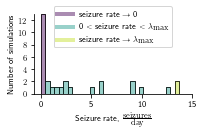

In [5]:
N=30
f_seiz_1year=[]

for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    f_seiz_1year.append(listt[1]['lambda_vec'][-1])
    
n_bin= listt[0]['lambda_max']*2+1

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1) 

plt.hist(f_seiz_1year,bins=n_bin, edgecolor='black', color='white',linewidth=2/size_scaler)
n, bins, patches = plt.hist(f_seiz_1year,bins=n_bin, edgecolor='black', color='white',alpha=alpha_value,linewidth=2/size_scaler)
patches[0].set_fc(color_scheme_3examples[0])
for x in range(1,30):
    patches[x].set_fc(color_scheme_3examples[1])
for x in range(30,31):
    patches[x].set_fc(color_scheme_3examples[2])

plt.plot(0,0,color=color_scheme_3examples[0],alpha=alpha_value,label=r'seizure rate $\rightarrow$ 0',linewidth=4)
plt.plot(0,0,color=color_scheme_3examples[1],alpha=alpha_value,label=r'0 $<$ seizure rate $< \lambda_\textnormal{max}$',linewidth=4)
plt.plot(0,0,color=color_scheme_3examples[2],alpha=alpha_value,label=r'seizure rate $\rightarrow \lambda_\textnormal{max}$',linewidth=4)
ax.legend(bbox_to_anchor=(0.1,1.15), loc='upper left', prop={'size': 8})

plt.ylim(0,13)
plt.yticks([0,2,4,6,8,10,12])
xtix=list([0,5,10,15])
# ytix.append(r'$P_{\textnormal{max}}$')
plt.xticks([0,5,10,listt[0]['lambda_max']],xtix)
plt.ylabel('Number of simulations')
plt.xlabel(r'Seizure rate, $\frac{\textnormal{seizures}}{\textnormal{day}}$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(2*w,w)
fig.savefig('Figures/Fig5/Fig_5a.pdf')

## Figure 5b

0.0028276849144774404
1.6906652514181195
13.688985879222791


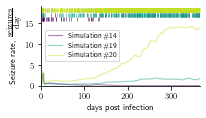

In [6]:
labels=['Simulation \#'+str(Num_sims[0]),'Simulation \#'+str(Num_sims[1]),'Simulation \#'+str(Num_sims[2])]

f_seiz_1year=[]

fig1 = plt.figure(figsize=[2*w,1.25*w])
ax = fig1.add_subplot(1, 1, 1)

for ii in range(0,len(Num_sims)):    
    listt=np.load(DataPath+'/Sim_'+str(Num_sims[ii])+'.npy',allow_pickle=True) 
    params_dict=listt[0]
    t_vec = listt[1]['t_vec']
    I_vec = listt[1]['I_vec']
    B_vec = listt[1]['B_vec']
    D_vec = listt[1]['D_vec']
    R_vec = listt[1]['R_vec']
    lambda_vec = listt[1]['lambda_vec']
    S_vec = listt[1]['S_vec']
    dt=listt[0]['dt']

    if ii==0:
        ax.set_ybound(0,params_dict['lambda_max']*1.05)
    ymin, ymax = plt.ylim()  # return the current ylim
    
    plt.plot(t_vec[S_vec!=0],(ymax+0.25)*np.ones(len(t_vec[S_vec!=0])),marker='|',color=color_scheme_3examples[ii],alpha=0.5, markersize=10/size_scaler, label=None,linewidth=0)
    plt.xlabel('days post infection')
    plt.ylabel(r'Seizure rate, $\frac{\textnormal{seizures}}{\textnormal{day}}$')
    
    plt.plot(t_vec,lambda_vec,color=color_scheme_3examples[ii],alpha=alpha_value,label=labels[ii],linewidth=3/size_scaler)
    print(lambda_vec[-1])
    ymin, ymax = plt.ylim()  # return the current ylim
    ax.set_ybound(0,ymax)
    plt.xlim(0,params_dict['t_end'])
    plt.yticks([0,5,10,15])

ax.legend(bbox_to_anchor=(0.005, 0.75), loc='upper left', prop={'size': 7})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(2*w,w) 
fig1.savefig('Figures/Fig5/Fig_5b.pdf')

## Figure 5c

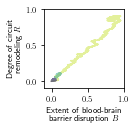

In [15]:
labels=['Simulation \#'+str(Num_sims[0]),'Simulation \#'+str(Num_sims[1]),'Simulation \#'+str(Num_sims[2])]

f_seiz_1year=[]

fig1 = plt.figure(figsize=[2*w,1.25*w])
ax = fig1.add_subplot(1, 1, 1)

B_max = 1
R_max = 1
B_min = -0.1
R_min = -0.1

for ii in reversed(range(0,len(Num_sims))):    
    listt=np.load(DataPath+'/Sim_'+str(Num_sims[ii])+'.npy',allow_pickle=True) 
    t_vec=listt[1]['t_vec'].copy()
    B_vec=listt[1]['B_vec'].copy()
    R_vec=listt[1]['R_vec'].copy()
    plt.plot(B_vec,R_vec,color=color_scheme_3examples[ii],alpha=alpha_value)
#     for kk in range(1,int(np.floor(t_vec[-1]/dt_vis+1))):
#         plt.plot(B_vec[kk*int(dt_vis/dt)],R_vec[kk*int(dt_vis/dt)],'.',color=color_scheme_3examples[ii],markersize=5/size_scaler)

plt.xlabel("Extent of blood-brain \n" 
           r"barrier disruption $B$")
plt.ylabel("Degree of circuit \n"
       r"remodeling $R$")
ax.set_xlim([B_min,B_max])
ax.set_ylim([R_min,R_max])

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(1*w,w)
    
fig1.savefig('Figures/Fig5/Fig_5c1.pdf')

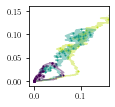

In [16]:
labels=['Simulation \#'+str(Num_sims[0]),'Simulation \#'+str(Num_sims[1]),'Simulation \#'+str(Num_sims[2])]

f_seiz_1year=[]

fig1 = plt.figure(figsize=[2*w,1.25*w])
ax = fig1.add_subplot(1, 1, 1)

B_max = 0.16
R_max = 0.16
B_min = -0.01
R_min = -0.01

for ii in reversed(range(0,len(Num_sims))):    
    listt=np.load(DataPath+'/Sim_'+str(Num_sims[ii])+'.npy',allow_pickle=True) 
    t_vec=listt[1]['t_vec'].copy()
    B_vec=listt[1]['B_vec'].copy()
    R_vec=listt[1]['R_vec'].copy()
    plt.plot(B_vec,R_vec,color=color_scheme_3examples[ii],alpha=alpha_value)
    for kk in range(1,int(np.floor(t_vec[-1]/dt_vis+1))):
        plt.plot(B_vec[kk*int(dt_vis/dt)],R_vec[kk*int(dt_vis/dt)],'.',color=color_scheme_3examples[ii],markersize=5/size_scaler)

# plt.xlabel("Extent of blood-brain \n" 
#            r"barrier disruption $B$")
# plt.ylabel("Degree of circuit \n"
#        r"remodeling $R$")
ax.set_xlim([B_min,B_max])
ax.set_ylim([R_min,R_max])

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(1*w,w)
    
fig1.savefig('Figures/Fig5/Fig_5c2.pdf')